In [30]:
from hands_on_ml.chapter_2 import input_data, split, feature_engineering, config, preprocess, train, evaluate

# Input Data and Preprocessing

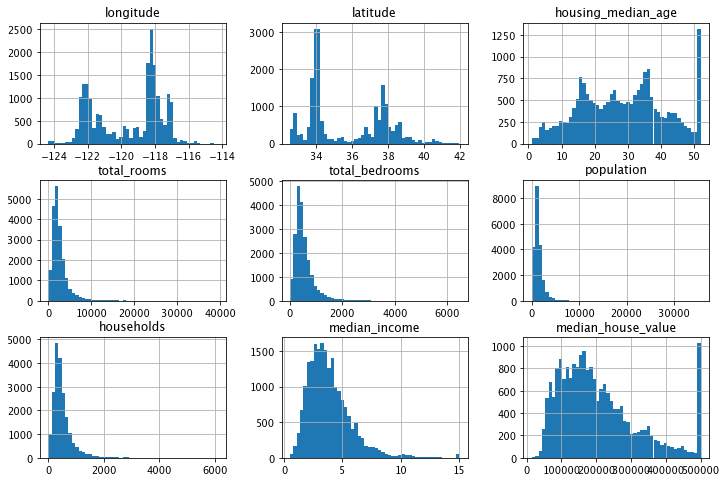

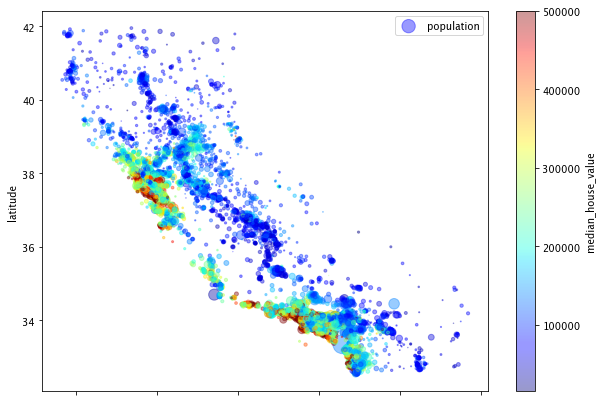

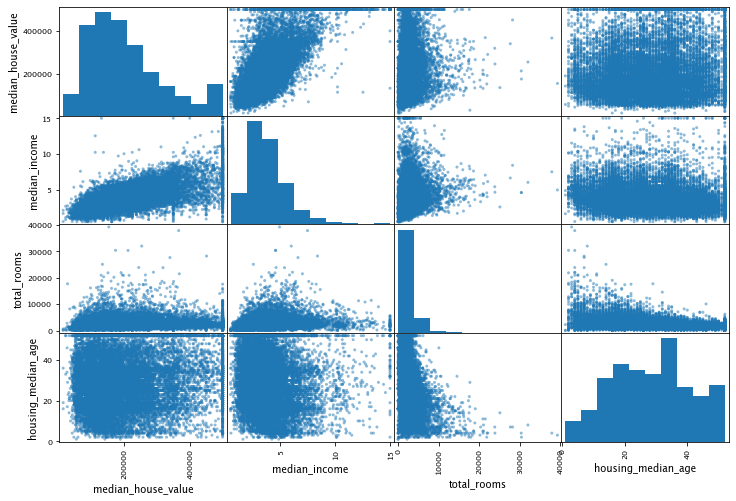

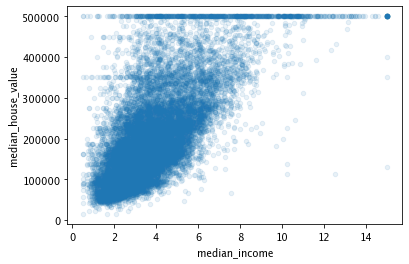

In [12]:
raw = input_data.run(config_data=config.CONFIG_DATA)
with_features = feature_engineering.run(raw)
sample_split = split.run(with_features, config_data=config.CONFIG_DATA)
attributes = preprocess.get_attributes(training_set=sample_split['training_set'],
                                       config_preproc=config.CONFIG_PREPROC)
preproc_pipeline = preprocess.gen_pipeline(attributes, config.CONFIG_PREPROC)

# CONFIG_TRAIN Layout

In [7]:
config.CONFIG_TRAIN

{'algorithm': {'type': 'svm',
  'name': 'SVR',
  'params': {'kernel': 'linear', 'C': 0.5, 'gamma': 'auto'}},
 'grid_search': {'name': 'RandomizedSearchCV',
  'params': {'param_distributions': [{'model__kernel': ['linear', 'rbf'],
     'model__C': [0.2, 0.4, 0.6, 0.8, 1.0],
     'model__gamma': ['auto', 'scale']},
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False],
     'n_estimators': [3, 10],
     'max_features': [2, 3, 4]}],
   'cv': 5,
   'scoring': 'neg_mean_squared_error',
   'return_train_score': True,
   'n_iter': 5}}}

# Linear Regression

In [26]:
config_train = {'algorithm': {'type': 'linear_model',
                              'name': 'LinearRegression',
                              'params': {}},
                'grid_search': {'name': 'GridSearchCV',
                                'params': {
                                    'param_grid': [
                                        {'model__fit_intercept': [True, False]}
                                    ],
                                    'cv': 5,
                                    'scoring': 'neg_mean_squared_error',
                                    'return_train_score': True
                                }}
                }

In [21]:
estimators = train.run(sample_split, config_train, preproc_pipeline)
trained = {'split': sample_split,
           'attributes': attributes,
           'estimators': estimators}

In [27]:
model_evaluation = evaluate.run(trained,
                                config_evaluation=config.CONFIG_EVALUATION)

Best model: {'model__fit_intercept': False}
RMSE: 72599.98
RMSE (95%): [70262.39,74864.62]


Scores: [76818.34792572 71544.41935832 70442.02243222 76530.12544629
 72830.61185854 78520.66839125 74972.30348864 74338.4616369
 72914.49886393 75383.98536302]
Mean: 74429.54
Standard deviation: 2390.53


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
config_train = {'algorithm': {'type': 'tree',
                              'name': 'DecisionTreeRegressor',
                              'params': {}},
                'grid_search': {'name': 'GridSearchCV',
                                'params': {
                                    'param_grid': [
                                        {'model__splitter': ["best", "random"],
                                         'model__max_depth': [1, 5, 10, 20, None],
                                         'model__max_features': [2, 4, 6, None]}
                                    ],
                                    'cv': 5,
                                    'scoring': 'neg_mean_squared_error',
                                    'return_train_score': True
                                }}
                }

In [35]:
estimators = train.run(sample_split, config_train, preproc_pipeline)
trained = {'split': sample_split,
           'attributes': attributes,
           'estimators': estimators}

In [36]:
model_evaluation = evaluate.run(trained,
                                config_evaluation=config.CONFIG_EVALUATION)

Best model: {'model__max_depth': 5, 'model__max_features': 6, 'model__splitter': 'best'}
RMSE: 71468.69
RMSE (95%): [69083.07,73777.21]


Scores: [100003.98312002 100375.33794588  95287.00639239 104467.5262713
  96013.32682081 104169.19482468 103110.29040433  95285.31946751
  99045.73827978 103726.86096582]
Mean: 100148.46
Standard deviation: 3493.85


# Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
config_train = {'algorithm': {'type': 'ensemble',
                              'name': 'RandomForestRegressor',
                              'params': {}},
                'grid_search': {'name': 'GridSearchCV',
                                'params': {
                                    'param_grid': [
                                        {'model__n_estimators': [3, 10, 30],
                                         'model__max_features': [2, 3, 4, None]},
                                        {'model__bootstrap': [False],
                                         'model__n_estimators': [3, 10],
                                         'model__max_features': [2, 3, 4, None]}
                                    ],
                                    'cv': 5,
                                    'scoring': 'neg_mean_squared_error',
                                    'return_train_score': True
                                }}
                }

In [43]:
estimators = train.run(sample_split, config_train, preproc_pipeline)
trained = {'split': sample_split,
           'attributes': attributes,
           'estimators': estimators}

In [45]:
model_evaluation = evaluate.run(trained,
                                config_evaluation=config.CONFIG_EVALUATION)

Best model: {'model__max_features': 4, 'model__n_estimators': 30}
RMSE: 84495.30
RMSE (95%): [81919.86,86994.52]


Scores: [87122.24661661 85826.29599825 82539.49002584 89000.48030663
 82917.04089538 89815.0497753  87910.39397518 82424.86392345
 84902.90463383 88392.75535251]
Mean: 86085.15
Standard deviation: 2638.46


# Support Vector Regression

In [51]:
from sklearn.svm import SVR

In [65]:
config_train = {'algorithm': {'type': 'svm',
                              'name': 'SVR',
                              'params': {'kernel': 'linear',
                                         'C': 30000}},
                'grid_search': {'name': 'GridSearchCV',
                                'params': {
                                    'param_grid': [
                                        {'model__kernel': ['linear', 'rbf'],
                                         'model__C': [10000, 30000, 50000]}
                                    ],
                                    'cv': 5,
                                    'scoring': 'neg_mean_squared_error',
                                    'return_train_score': True,
                                    'verbose': 2,
                                }}
                }

In [66]:
estimators = train.run(sample_split, config_train, preproc_pipeline)
trained = {'split': sample_split,
           'attributes': attributes,
           'estimators': estimators}

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............model__C=10000, model__kernel=linear; total time=   3.4s
[CV] END ...............model__C=10000, model__kernel=linear; total time=   3.4s
[CV] END ...............model__C=10000, model__kernel=linear; total time=   3.4s
[CV] END ...............model__C=10000, model__kernel=linear; total time=   3.4s
[CV] END ...............model__C=10000, model__kernel=linear; total time=   3.5s
[CV] END ..................model__C=10000, model__kernel=rbf; total time=   5.0s
[CV] END ..................model__C=10000, model__kernel=rbf; total time=   5.0s
[CV] END ..................model__C=10000, model__kernel=rbf; total time=   5.0s
[CV] END ..................model__C=10000, model__kernel=rbf; total time=   5.1s
[CV] END ..................model__C=10000, model__kernel=rbf; total time=   5.1s
[CV] END ...............model__C=30000, model__kernel=linear; total time=   3.6s
[CV] END ...............model__C=30000, model__ke

In [67]:
model_evaluation = evaluate.run(trained,
                                config_evaluation=config.CONFIG_EVALUATION)

Best model: {'model__C': 10000, 'model__kernel': 'rbf'}


Scores: [114237.93141245 117314.91383654 111155.30968616 117704.53076628
 111945.4012293  120031.47864745 117227.68918912 115694.14809325
 117363.10211052 116113.49696671]
Mean: 115878.80
Standard deviation: 2592.83


RMSE: 72837.95
RMSE (95%): [70095.17,75481.14]


# RandomizedSearchCV

In [68]:
from scipy.stats import expon, reciprocal

In [71]:
config_train = {'algorithm': {'type': 'svm',
                              'name': 'SVR',
                              'params': {'kernel': 'linear',
                                         'C': 30000}},
                'grid_search': {'name': 'RandomizedSearchCV',
                                'params': {
                                    'param_distributions': [
                                        {'model__kernel': ['linear', 'rbf'],
                                         'model__C': reciprocal(20, 200000),
                                         'model__gamma': expon(scale=1.0)}
                                    ],
                                    'cv': 5,
                                    'scoring': 'neg_mean_squared_error',
                                    'return_train_score': True,
                                    'n_iter': 6,
                                    'verbose': 2
                                }}
                }

In [72]:
estimators = train.run(sample_split, config_train, preproc_pipeline)
trained = {'split': sample_split,
           'attributes': attributes,
           'estimators': estimators}

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END model__C=37.468236746115544, model__gamma=0.19583545752812342, model__kernel=rbf; total time=   5.3s
[CV] END model__C=37.468236746115544, model__gamma=0.19583545752812342, model__kernel=rbf; total time=   5.3s
[CV] END model__C=37.468236746115544, model__gamma=0.19583545752812342, model__kernel=rbf; total time=   5.2s
[CV] END model__C=37.468236746115544, model__gamma=0.19583545752812342, model__kernel=rbf; total time=   5.3s
[CV] END model__C=37.468236746115544, model__gamma=0.19583545752812342, model__kernel=rbf; total time=   5.3s
[CV] END model__C=374.42499997238457, model__gamma=0.4648013790199353, model__kernel=linear; total time=   3.4s
[CV] END model__C=374.42499997238457, model__gamma=0.4648013790199353, model__kernel=linear; total time=   3.3s
[CV] END model__C=374.42499997238457, model__gamma=0.4648013790199353, model__kernel=linear; total time=   3.4s
[CV] END model__C=374.42499997238457, model__gamma=0.4

In [73]:
model_evaluation = evaluate.run(trained,
                                config_evaluation=config.CONFIG_EVALUATION)

Best model: {'model__C': 5079.420742949688, 'model__gamma': 1.5227790944968491, 'model__kernel': 'rbf'}


Scores: [78342.82201913 74022.8293718  71331.77707612 78351.91988987
 73796.14037606 80131.40248277 77196.08775257 76034.32227489
 74407.63319015 76540.8147762 ]
Mean: 76015.57
Standard deviation: 2508.08


RMSE: 72223.49
RMSE (95%): [69570.85,74782.10]
